Here, we are downloading the Guerry Dataset, and since it is very easy to query an API and get our dataset, there is little reason to host the dataset locally :) 

Link to dataset, in case you wish to use it locally: https://vincentarelbundock.github.io/Rdatasets/articles/data.html 

A little bit about the enviornment: 
1.) Python version = 3.7.10
2.) Required Packages: statsmodels.api, pandas, and patsy. (note, Patsy is used to help design Matrices and gives a very simlar feel to R.)

In [2]:
import statsmodels.api as sm 
import pandas as pd 
from patsy import dmatrices

In [3]:
data = sm.datasets.get_rdataset("Guerry", "HistData").data

Let's take a look at our Data, and begin our preparations / cleanings 

In [4]:
data.head(3)
data.describe()

,dept,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,Wealth,Commerce,Clergy,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,46.883721,19754.406977,7843.058140,39.255814,7075.546512,19049.906977,36522.604651,43.500000,42.802326,43.430233,43.500000,43.511628,43.500000,43.500000,43.500000,43.127907,141.872093,207.953140,6146.988372,378.628721
std,30.426157,7504.703073,3051.352839,17.364051,5834.595216,8820.233546,31312.532649,24.969982,25.028370,24.999549,24.969982,24.948297,24.969982,24.969982,24.969982,24.799809,520.969318,109.320837,1398.246620,148.777230
min,1.000000,2199.000000,1368.000000,12.000000,1246.000000,2660.000000,3460.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,762.000000,129.100000
25%,24.250000,14156.250000,5933.000000,25.000000,3446.750000,14299.750000,15463.000000,22.250000,21.250000,22.250000,22.250000,22.250000,22.250000,22.250000,22.250000,23.250000,6.000000,121.383000,5400.750000,283.005000
50%,45.500000,18748.500000,7595.000000,38.000000,5020.000000,17141.500000,26743.500000,43.500000,42.500000,43.500000,43.500000,43.500000,43.500000,43.500000,43.500000,41.500000,33.000000,200.616000,6070.500000,346.165000
75%,66.750000,25937.500000,9182.250000,51.750000,9446.750000,22682.250000,44057.500000,64.750000,63.750000,64.750000,64.750000,64.750000,64.750000,64.750000,64.750000,64.750000,113.750000,289.670500,6816.500000,444.407500
max,200.000000,37014.000000,20235.000000,74.000000,37015.000000,62486.000000,163241.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,4744.000000,539.213000,10000.000000,989.940000


Right off the bat, we see that there are (only) 86 observations. 

Selecting the variables of interest: Department, Lottery, Literacy, Wealth, and Region
Let's take a look at the bottom 5 rows

In [5]:
vars = ['Department', 'Lottery', 'Literacy', 'Wealth', 'Region']

df = data[vars]
df.tail(5)
# df[-5:] # Alternatively 

,Department,Lottery,Literacy,Wealth,Region
81,Vienne,40,25,68,W
82,Haute-Vienne,55,13,67,C
83,Vosges,14,62,82,E
84,Yonne,51,47,30,C
85,Corse,83,49,37,NaN


Note the missing value in the Region Column. In a more robust format, we may be able to find another way to deal with it. Here, we are just going to eliminate it. 
Pandas makes that function quite simple with the "dropna" function. 

In [6]:
df = df.dropna()
#check to see the NaN values have been eliminated 
print(df[-5:])

      Department  Lottery  Literacy  Wealth Region
80        Vendee       68        28      56      W
81        Vienne       40        25      68      W
82  Haute-Vienne       55        13      67      C
83        Vosges       14        62      82      E
84         Yonne       51        47      30      C


Looks like there were more than 1 NaN, and it would have been very easy to find in an earlier step. But now that we have eliminated all the missing values, lets begin to see if we can find correlation between Literacy and Wealth  

In [7]:
y, X = dmatrices('Lottery ~ Literacy + Wealth + Region', data = df, return_type = 'dataframe')

Our new Matrices look like this: 

In [8]:
print(y, X)

    Lottery
0      41.0
1      38.0
2      66.0
3      80.0
4      79.0
..      ...
80     68.0
81     40.0
82     55.0
83     14.0
84     51.0

[85 rows x 1 columns]     Intercept  Region[T.E]  Region[T.N]  Region[T.S]  Region[T.W]  Literacy  \
0         1.0          1.0          0.0          0.0          0.0      37.0   
1         1.0          0.0          1.0          0.0          0.0      51.0   
2         1.0          0.0          0.0          0.0          0.0      13.0   
3         1.0          1.0          0.0          0.0          0.0      46.0   
4         1.0          1.0          0.0          0.0          0.0      69.0   
..        ...          ...          ...          ...          ...       ...   
80        1.0          0.0          0.0          0.0          1.0      28.0   
81        1.0          0.0          0.0          0.0          1.0      25.0   
82        1.0          0.0          0.0          0.0          0.0      13.0   
83        1.0          1.0          0.0    

In [9]:
y[:3]


,Lottery
0,41.0
1,38.0
2,66.0


In [10]:
X[:3]

,Intercept,Region[T.E],Region[T.N],Region[T.S],Region[T.W],Literacy,Wealth
0,1.0,1.0,0.0,0.0,0.0,37.0,73.0
1,1.0,0.0,1.0,0.0,0.0,51.0,22.0
2,1.0,0.0,0.0,0.0,0.0,13.0,61.0


Model Fit and Summary Stats

In [11]:
mod = sm.OLS(y, X)

In [12]:
res = mod.fit()

In [13]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     6.636
Date:                Sun, 30 May 2021   Prob (F-statistic):           1.07e-05
Time:                        14:35:58   Log-Likelihood:                -375.30
No. Observations:                  85   AIC:                             764.6
Df Residuals:                      78   BIC:                             781.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      38.6517      9.456      4.087      

In [14]:
res.params

Intercept      38.651655
Region[T.E]   -15.427785
Region[T.N]   -10.016961
Region[T.S]    -4.548257
Region[T.W]   -10.091276
Literacy       -0.185819
Wealth          0.451475
dtype: float64

In [15]:
res.rsquared

0.337950869192882

Diagnostics and Specification Tests

In [16]:
sm.stats.linear_rainbow(res)

(0.8472339976156913, 0.6997965543621643)

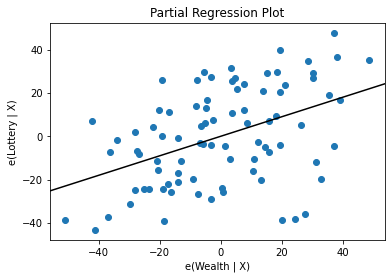

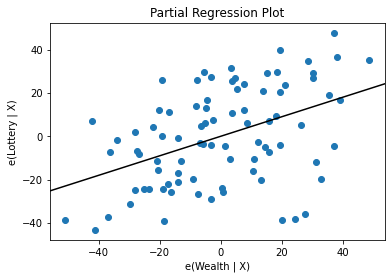

In [17]:
sm.graphics.plot_partregress('Lottery', 'Wealth', ['Region', 'Literacy'],
                             data=df, obs_labels=False)